<a href="https://colab.research.google.com/github/Bharat-Moorthy/MLAI---Paathsalaassignments/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

In [42]:
#LOading the dataset

In [2]:
car_price=pd.read_csv("/content/car_purchasing.csv",encoding='latin-1')

In [43]:
#Basic information of the dataset

In [3]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [44]:
#Check the missing values of the dataset

In [4]:
car_price.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [45]:
#NO null values found 

In [5]:
car_price.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [46]:
#Taking the statistical summary of the Dataset

In [6]:
car_price.describe(include="all")

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
unique,498,500,211,NaN,NaN,NaN,NaN,NaN,NaN
top,Seth,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Israel,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,1,6,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,NaN,NaN,NaN,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,NaN,NaN,NaN,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,NaN,NaN,NaN,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,NaN,NaN,NaN,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,NaN,NaN,NaN,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517


In [47]:
#From the above we can see that the scaling is required for the columns as they are in different ranges

In [48]:
#Basic visualisation of the columns 

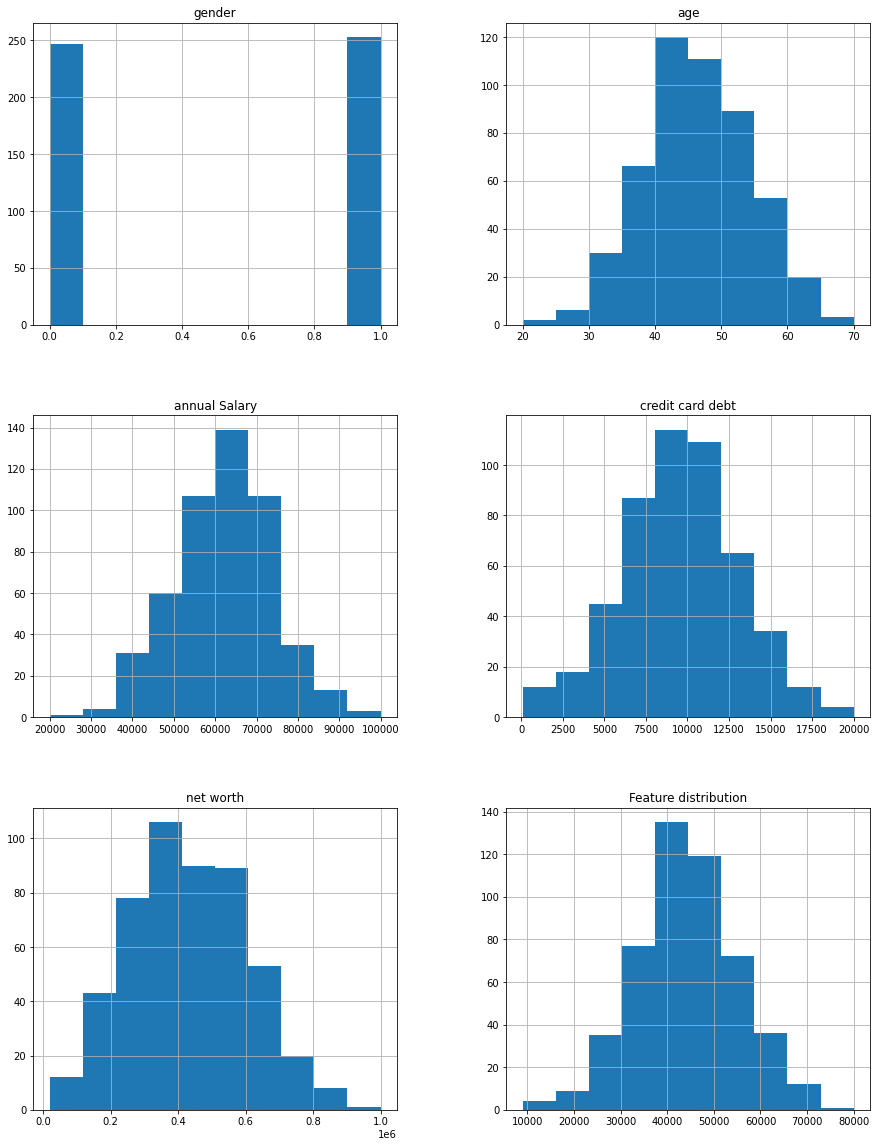

In [7]:
car_price.hist(figsize=(15,20))
plt.title("Feature distribution")
plt.show()

In [8]:
#Almost all feature look close to normal distribution and there is not much skewness in the data

In [49]:
#We can drop the 3 object variables as they are not much contributing to the prediction

In [9]:
car_price.drop(['customer name', 'country', 'customer e-mail'],axis=1,inplace=True)

In [10]:
car_price.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [11]:
car_price.dtypes

gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object

In [50]:
#We can see that now only numerical data types are there 

In [51]:
#We can split in to X and Y 

In [12]:
x=car_price.drop(["car purchase amount"],axis=1)
y=car_price["car purchase amount"]

In [52]:
#We are doing the scaling as there is a wide spred of the data understood from the statistical summary

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y=scaler.fit_transform(y.values.reshape(-1,1))

In [53]:
#We are splitting the dataset in X train, X test , y train and y test 

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#from sklearn.preprocessing import StandardScaler

#sc=StandardScaler()
#x_train=sc.fit_transform(x_train)
#x_test=sc.fit_transform(x_test)

In [54]:
#NOW we will do the modelling using the different hidden layers and see the difference in MSE 

In [55]:
#5 hidden layers and 64 neurons and epochs =100 - model 1

In [16]:
classifier1=Sequential()
#model : input layer , H1,H2,output layer
#input layer
classifier1.add(Dense(units=64,kernel_initializer="uniform",activation="relu",input_dim=5))
classifier1.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))
classifier1.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))
classifier1.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))
classifier1.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))
classifier1.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))

classifier1.compile(optimizer="adam",loss='mean_squared_error',metrics=["mse"])

In [17]:
history1 = classifier1.fit(x_train , y_train , epochs = 100, batch_size = 64,
           validation_split = 0.2,verbose=1)

Epoch 1/100
5/5 [==============================] - 3s 48ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0245 - mse: 0.0245 - va

In [56]:
#3 hidden layers and epochs 100 , neurons = 64 - model 2 

In [19]:
classifier2=Sequential()


classifier2.add(Dense(units=64,kernel_initializer="uniform",activation="relu",input_dim=5))
classifier2.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))
classifier2.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))
classifier2.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))

classifier2.compile(optimizer="adam",loss='mean_squared_error',metrics=["mse"])

In [20]:
history2 = classifier2.fit(x_train , y_train , epochs = 100, batch_size = 64,
           validation_split = 0.2,verbose=1)

Epoch 1/100
5/5 [==============================] - 0s 35ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0240 - mse: 0.0240 - va

In [57]:
#4 hidden layers and epochs 100 , neurons = 64 - model 3

In [22]:
classifier3=Sequential()
#model : input layer , H1,H2,output layer
#input layer
classifier3.add(Dense(units=64,kernel_initializer="uniform",activation="relu",input_dim=5))
classifier2.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))
classifier3.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))
classifier3.add(Dense(units=64,kernel_initializer="uniform",activation="relu"))
classifier3.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))

classifier3.compile(optimizer="adam",loss='mean_squared_error',metrics=["mse"])

In [23]:
history3 = classifier3.fit(x_train , y_train , epochs = 100, batch_size = 64,
           validation_split = 0.2,verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 37ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0238 - mse: 0.0238 - va

In [25]:
#in the 3 , 4 ,hidden layers , MSE almost same , but in 5 hidden layers MSE reduces further

In [26]:
y_pred = classifier1.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

7.203676379870528e-06

In [29]:
history1.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

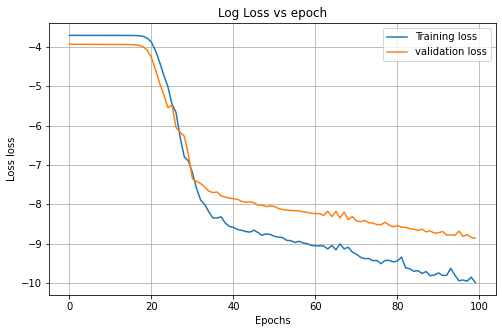

In [31]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.log(history1.history['loss']), label = "Training loss")
ax.plot(np.log(history1.history['val_loss']), label = "validation loss")
ax.set_title("Log Loss vs epoch")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss loss")
ax.legend()
ax.grid()
plt.show()

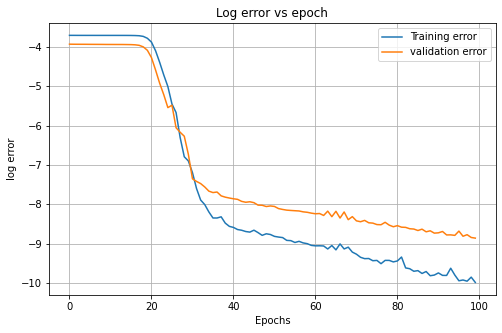

In [32]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.log(history1.history['mse']), label = "Training error")
ax.plot(np.log(history1.history['val_mse']), label = "validation error")
ax.set_title("Log error vs epoch")
ax.set_xlabel("Epochs")
ax.set_ylabel("log error")
ax.legend()
ax.grid()
plt.show()

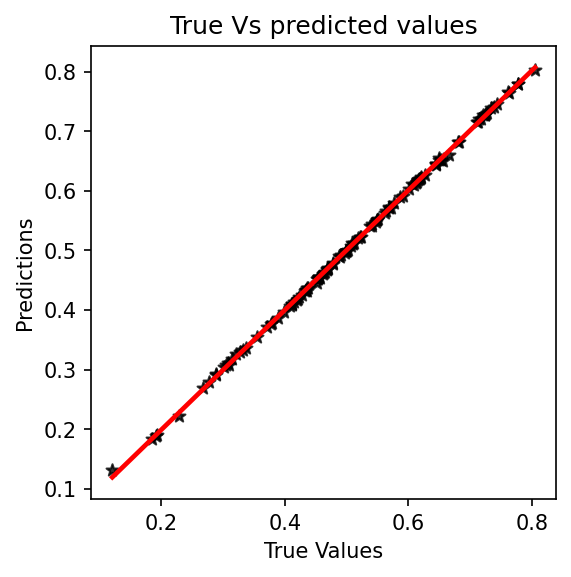

In [40]:
import seaborn as sns
plt.figure(figsize=(4,4),dpi=150)
sns.regplot(x=y_test, y=y_pred,color='red',marker='*',scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title('True Vs predicted values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [41]:
# SInce the MSE error is very less in the model , the values are almost matching the regression line and thus the model is predicting almost exact values 